# Discovery notebook for cycling crash data

Crash data from 2016 to 2023.

This data came from the Louisville Open Data portal

Source: https://data.louisvilleky.gov/datasets/

LOJIC::louisville-metro-ky-traffic-fatalities-and-suspected-serious-injuries-1/explore

Shape: 4901 rows x 44 columns

In [6]:
import pandas as pd
import matplotlib

DATA = "../data/Louisville_Metro_KY_-_Traffic_Fatalities_and_Suspected_Serious_Injuries.csv"
df = pd.read_csv(DATA)
df2=df # remove this later



## LOJIC data dictionary

| column name | type | description | value notes | cleaning notes | 
|-------------|------|-------------|-------------|----------------|
| X |
| Y |
| IncidentID |
| AgencyName |
| RdwyNumber |
| Street |
| StreetDir |
| RoadwayName |
| StreetSfx |
| OWNER |
| ROAD_CLASSIFICATION |
| COUNCIL_DISTRICT |
| IntersectionRdwy |
| IntersectionRdwyName |
| BetweenStRdwy1 |
| BetweenStRdwyName1 |
| BetweenStRdwy2 |
| BetweenStRdwyName2 |
| Latitude |
| Longitude |
| Milepoint |
| DAY_OF_WEEK |
| CollisionDate |
| CollisionTime |
| HOUR_OF_DAY |
| UnitsInvolved |
| MotorVehiclesInvolved |
| MODE |
| NAME |
| AGE |
| GENDER |
| SEVERITY |
| LINK |
| Weather |
| RdwyConditionCode |
| HitandRun |
| DirAnalysisCode |
| MannerofCollision |
| RdwyCharacter |
| LightCondition |
| RampFromRdwyId |
| RampToRdwyId |
| IsSecondaryCollision |
| ObjectId |


In [7]:
df2.columns


Index(['X', 'Y', 'IncidentID', 'AgencyName', 'RdwyNumber', 'Street',
       'StreetDir', 'RoadwayName', 'StreetSfx', 'OWNER', 'ROAD_CLASSIFICATION',
       'COUNCIL_DISTRICT', 'IntersectionRdwy', 'IntersectionRdwyName',
       'BetweenStRdwy1', 'BetweenStRdwyName1', 'BetweenStRdwy2',
       'BetweenStRdwyName2', 'Latitude', 'Longitude', 'Milepoint',
       'DAY_OF_WEEK', 'CollisionDate', 'CollisionTime', 'HOUR_OF_DAY',
       'UnitsInvolved', 'MotorVehiclesInvolved', 'MODE', 'NAME', 'AGE',
       'GENDER', 'SEVERITY', 'LINK', 'Weather', 'RdwyConditionCode',
       'HitandRun', 'DirAnalysisCode', 'MannerofCollision', 'RdwyCharacter',
       'LightCondition', 'RampFromRdwyId', 'RampToRdwyId',
       'IsSecondaryCollision', 'ObjectId'],
      dtype='object')

In [8]:
# Grouping the columns in to sets of related information
# Identifying number for crash case
ID = df2['IncidentID']
ID.info()
len(ID.unique())
# Not all IDs are unique!



<class 'pandas.core.series.Series'>
RangeIndex: 4901 entries, 0 to 4900
Series name: IncidentID
Non-Null Count  Dtype
--------------  -----
4901 non-null   int64
dtypes: int64(1)
memory usage: 38.4 KB


4267

In [9]:

# Roadway mile point
df2['Milepoint']
# Is this useful for highway accidents?

0       12.640
1       12.800
2       12.800
3        0.086
4        7.886
         ...  
4896    16.809
4897     0.004
4898    15.062
4899     0.288
4900     5.102
Name: Milepoint, Length: 4901, dtype: float64

<Axes: ylabel='COUNCIL_DISTRICT'>

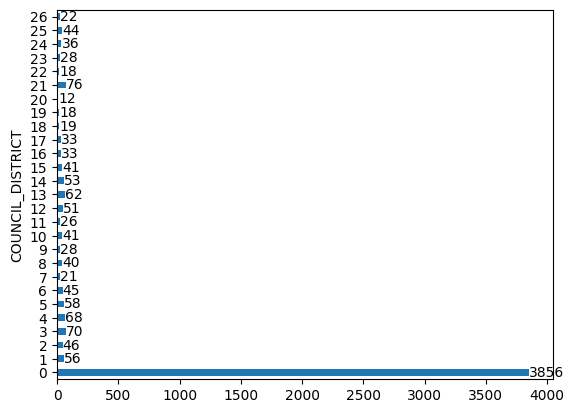

In [10]:


# Metro council district where crash occurred
CD = df2['COUNCIL_DISTRICT']
CD.unique()
values = CD.value_counts().sort_index()
values = values.sort_index()
ax = values.plot(kind = 'barh')
ax.bar_label(ax.containers[0])
ax


In [11]:

# Intersection info
df2[['IntersectionRdwy', 'IntersectionRdwyName']]
# Similar to other data


,IntersectionRdwy,IntersectionRdwyName
0,I 0064,I64 W EXIT12 RAMP TO I264 E
1,NaN,NaN
2,NaN,NaN
3,KY1703,BAXTER
4,NaN,NaN
...,...,...
4896,NaN,YOUNGLAND
4897,KY0155,TAYLORSVILLE
4898,NaN,NaN
4899,NaN,NaN


In [12]:

# Between streets info
df2[['BetweenStRdwy1', 'BetweenStRdwyName1', 'BetweenStRdwy2', 'BetweenStRdwyName2']]
# Similar to other data and similar to main road report


,BetweenStRdwy1,BetweenStRdwyName1,BetweenStRdwy2,BetweenStRdwyName2
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,DURRETT,NaN,STANDIFORD
...,...,...,...,...
4896,NaN,NaN,NaN,NaN
4897,NaN,NaN,NaN,NaN
4898,I 0064,I64 E EXIT15 OFF RAMP TO KY1747,I 0064,I64 E EXIT15B OFF RAMP TO KY1747
4899,NaN,NaN,NaN,NaN


In [13]:

# Time/date information
df2[['DAY_OF_WEEK', 'CollisionDate', 'CollisionTime', 'HOUR_OF_DAY']]
# Parse out CollisionDate 
# Check times against HOUR_OF_DAY
# Derive day of the week and check?


,DAY_OF_WEEK,CollisionDate,CollisionTime,HOUR_OF_DAY
0,MONDAY,2016/10/11 03:08:00+00,2308.0,11PM
1,WEDNESDAY,2016/10/12 13:02:00+00,902.0,9AM
2,WEDNESDAY,2016/10/12 13:02:00+00,902.0,9AM
3,WEDNESDAY,2016/10/12 19:31:00+00,1531.0,3PM
4,WEDNESDAY,2016/10/12 23:51:00+00,1951.0,7PM
...,...,...,...,...
4896,MONDAY,2022/09/12 22:55:00+00,1855.0,6PM
4897,FRIDAY,2022/09/16 05:47:00+00,147.0,1AM
4898,FRIDAY,2022/09/16 22:47:00+00,1847.0,6PM
4899,FRIDAY,2022/09/17 00:14:00+00,2014.0,8PM


<Axes: xlabel='UnitsInvolved'>

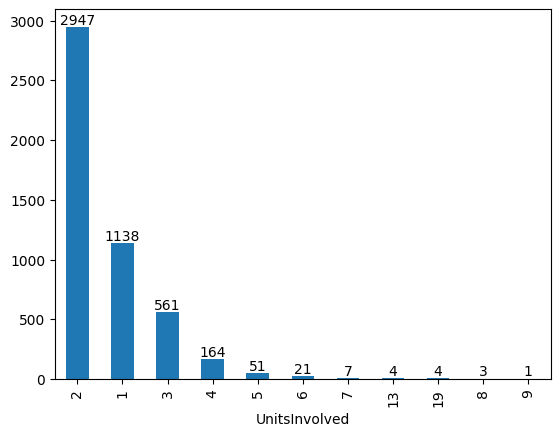

In [14]:
# Number of vehicles involves and # of motor vehicles.
ax = df2['UnitsInvolved'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
ax


<Axes: xlabel='MotorVehiclesInvolved'>

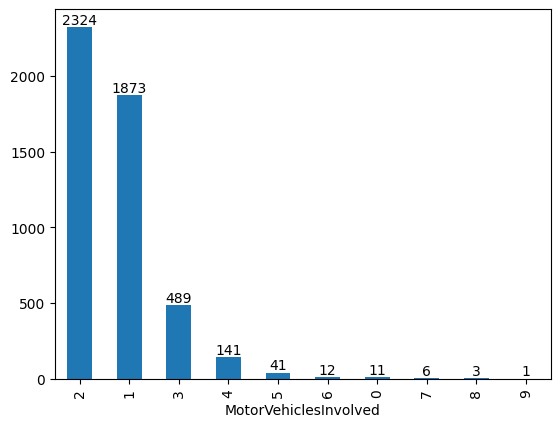

In [15]:
ax = df2['MotorVehiclesInvolved'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
ax


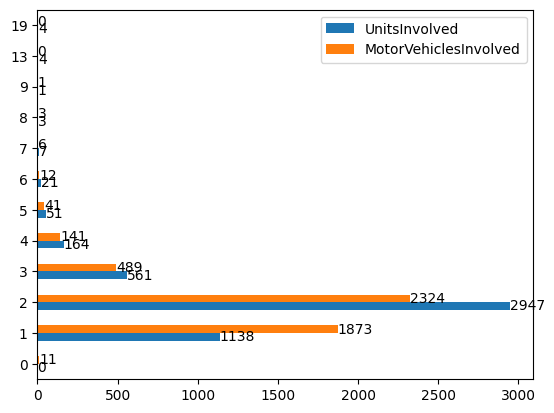

In [16]:
units = df2[['UnitsInvolved', 'MotorVehiclesInvolved']]
ax = units.apply(lambda x : x.value_counts()).plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)

In [17]:
# Object Id column
df2['ObjectId'].info()
len(df2['ObjectId'].unique())
# Unique identifier for row. 



<class 'pandas.core.series.Series'>
RangeIndex: 4901 entries, 0 to 4900
Series name: ObjectId
Non-Null Count  Dtype
--------------  -----
4901 non-null   int64
dtypes: int64(1)
memory usage: 38.4 KB


4901

In [18]:
df2['AgencyName'].unique()
df2['AgencyName'].value_counts(dropna=False)
# No null values

AgencyName
LOUISVILLE METRO POLICE DEPT      4404
SHIVELY POLICE DEPARTMENT          220
JEFFERSONTOWN POLICE DEPT          111
ST. MATTHEWS POLICE DEPARTMENT      57
LYNDON POLICE DEPARTMENT            19
WEST BUECHEL POLICE DEPT.           18
PROSPECT POLICE DEPARTMENT          18
MIDDLETOWN POLICE DEPARTMENT        14
GRAYMOOR-DEVONDALE POLICE DEPT      13
INDIAN HILLS POLICE DEPARTMENT       6
AUDUBON PARK POLICE DEPARTMENT       4
NORTHFIELD POLICE DEPARTMENT         3
LOUISVILLE AIRPORT POLICE            3
UNIV. OF LOUISVILLE POLICE           3
ANCHORAGE POLICE DEPARTMENT          2
KY STATE POLICE, POST 04             2
WOODLAWN PARK POLICE DEPT            1
SIMPSONVILLE POLICE DEPARTMENT       1
HURSTBOURNE ACRES PD                 1
OLDHAM COUNTY SHERIFF DEPT.          1
Name: count, dtype: int64

In [19]:
df2[['RdwyNumber', 'Street', 'StreetDir', 'RoadwayName', 'StreetSfx']]


,RdwyNumber,Street,StreetDir,RoadwayName,StreetSfx
0,I 0064,NaN,NaN,I-64,NaN
1,I 0064,NaN,NaN,I-64,NaN
2,I 0064,NaN,NaN,I-64,NaN
3,NaN,NaN,NaN,GRINSTEAD,DR
4,KY0061,NaN,NaN,PRESTON,HWY
...,...,...,...,...,...
4896,US0031W,2700B,NaN,DIXIE,HWY
4897,KY0913,NaN,NaN,BLANKENBAKER,PKWY
4898,I 0064,NaN,NaN,I-64,NaN
4899,KY3082,NaN,NaN,BANK,ST


In [20]:
# Boolean indicators
df2[['HitandRun', 'IsSecondaryCollision']]
# Already set up as boolean values, no Y/N 1/0 nonsense.

,HitandRun,IsSecondaryCollision
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
4896,False,False
4897,False,False
4898,False,False
4899,False,False


In [21]:
# Geolocation columns
df2[['X', 'Y', 'Latitude', 'Longitude',]]
df2[df2['X'] != df2['Longitude']]
# Returns empty dataframe. All records match
df2[df2['Y'] != df2['Latitude']]
# Also empty
# X == Longitude and Y == Latitude
# Dropping X, Y, keeping Longitude, Latitude


,X,Y,IncidentID,AgencyName,RdwyNumber,Street,StreetDir,RoadwayName,StreetSfx,OWNER,...,RdwyConditionCode,HitandRun,DirAnalysisCode,MannerofCollision,RdwyCharacter,LightCondition,RampFromRdwyId,RampToRdwyId,IsSecondaryCollision,ObjectId


In [22]:
# Crash analysis/condition codes
df2[['Weather', 
'RdwyConditionCode',

'DirAnalysisCode', 'MannerofCollision', 
'RdwyCharacter',
'LightCondition',]]

,Weather,RdwyConditionCode,DirAnalysisCode,MannerofCollision,RdwyCharacter,LightCondition
0,CLEAR,DRY,ANGLE COLLISION - ONE VEHICLE TURNING LEFT,ANGLE,STRAIGHT & LEVEL,DAYLIGHT
1,CLEAR,DRY,ANGLE COLLISION - ONE VEHICLE TURNING LEFT,ANGLE,STRAIGHT & LEVEL,DAYLIGHT
2,CLEAR,DRY,REAR END IN TRAFFIC LANES BOTH VEHICLES MOVING,REAR END,STRAIGHT & LEVEL,DAYLIGHT
3,CLEAR,DRY,REAR END IN TRAFFIC LANES BOTH VEHICLES MOVING,REAR END,STRAIGHT & LEVEL,DAYLIGHT
4,CLEAR,DRY,1 VEHICLE ENTERING/LEAVING ENTRANCE,ANGLE,STRAIGHT & LEVEL,DARK-HWY LIGHTED/ON
...,...,...,...,...,...,...
4896,CLEAR,DRY,COLLISION WITH PEDESTRIAN IN INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
4897,CLEAR,DRY,OTHER INTERSECTION COLLISIONS,SINGLE VEHICLE,STRAIGHT & HILLCREST,DARK-HWY NOT LIGHTED
4898,CLEAR,DRY,OTHER ROADWAY OR MID-BLOCK COLLISION,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT
4899,CLEAR,DRY,1 VEHICLE ENTERING/LEAVING ENTRANCE,ANGLE,STRAIGHT & LEVEL,DARK-HWY LIGHTED/ON


In [23]:
df2[['MODE', 'NAME', 'AGE', 'GENDER', 'SEVERITY', 'LINK']]

,MODE,NAME,AGE,GENDER,SEVERITY,LINK
0,MOTOR VEHICLE,UNKNOWN OR NOT AVAILABLE,73.0,MALE,FATALITY,NaN
1,MOTORCYCLE,UNKNOWN OR NOT AVAILABLE,32.0,MALE,SUSPECTED SERIOUS INJURY,NaN
2,MOTOR VEHICLE,UNKNOWN OR NOT AVAILABLE,32.0,FEMALE,SUSPECTED SERIOUS INJURY,NaN
3,MOTOR VEHICLE,UNKNOWN OR NOT AVAILABLE,46.0,MALE,SUSPECTED SERIOUS INJURY,NaN
4,MOTOR VEHICLE,UNKNOWN OR NOT AVAILABLE,23.0,MALE,SUSPECTED SERIOUS INJURY,NaN
...,...,...,...,...,...,...
4896,PEDESTRIAN,UNKNOWN OR NOT AVAILABLE,41.0,MALE,SUSPECTED SERIOUS INJURY,NaN
4897,MOTOR VEHICLE,UNKNOWN OR NOT AVAILABLE,25.0,MALE,SUSPECTED SERIOUS INJURY,NaN
4898,MOTOR VEHICLE,UNKNOWN OR NOT AVAILABLE,27.0,MALE,SUSPECTED SERIOUS INJURY,NaN
4899,MOTOR SCOOTER,ISLES KENYETTA LEE DUNCAN,17.0,MALE,FATALITY,https://www.wdrb.com/news/police-teen-dies-aft...


In [24]:
df2[['RampFromRdwyId', 'RampToRdwyId',]].info()
# This data actually has values for these fields.
# I will have to ignore them anyway since I have nothing comparable in the other data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4901 entries, 0 to 4900
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RampFromRdwyId  122 non-null    object
 1   RampToRdwyId    122 non-null    object
dtypes: object(2)
memory usage: 76.7+ KB
